# Classification, again

Apologies.  Last class went *way* too fast.  I'm going to back up and try again from first principles, bit by bit.

Consequences: 
- more classification today.   
- lab 7 due by sunday  
- lab 8 due by sunday  


# Classification

**Basic problem:**  Define a rule that predicts labels based on input features.  

**ML formulation:** Given some prior examples with correct labels, *learn* a rule to do this.

## Manual Example

Classifying legendary pokemon.

In [16]:
import matplotlib.pyplot as plt
plt.rc('font', size=16)

In [18]:
import pandas as pd
import numpy as np
poke = pd.read_csv('Pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [21]:
X = poke['Total']
y = poke['Legendary']

### Manual classification

Let's pick a rule based on the single variable called `Total`.  
That rule amounts to a threshold: everything above that threshold we will call Legendary, everything below, we will call not legendary

In [40]:
threshold = 550
y_predicted = X > threshold
(y == y_predicted).mean()

0.92875

In [41]:
y.mean()

0.08125

### Manual calculation of confusion matrix, etc.

rows: label in reality
cols: label we predict



In [46]:
# how many things are actually legendary and *predicted* as legendary?

# True & True
print(sum((y==True) & (y_predicted == True)))
# True & False: legendary pokemon that we labeled as not legendary
print(sum((y==True) & (y_predicted == False)))
# False & True
print(sum((y==False) & (y_predicted == True)))
# False & False
print(sum((y==False) & (y_predicted == False)))

65
0
57
678


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_predicted)

array([[678,  57],
       [  0,  65]])

True positive Rate:  what fraction of things that were truly positive, did we label as positive.   

False positive rate:  what fraction of things that were not positive in reality, did we label as positive

In [53]:
tpr = sum((y==True) & (y_predicted == True)) / sum(y==True)
tpr

1.0

In [54]:
fpr = sum((y==False) & (y_predicted == True)) / sum(y==False)
fpr

0.07755102040816327

In [61]:
def tpr_fpr(threshold):
    y_predicted = X > threshold
    positive_rate = (y_predicted==True).mean()
    tpr = sum((y==True) & (y_predicted == True)) / sum(y==True)
    fpr = sum((y==False) & (y_predicted == True)) / sum(y==False)
    return {'tpr':tpr, 'fpr':fpr, 'ppr':positive_rate}


{'tpr': 0.09230769230769231, 'fpr': 0.0, 'ppr': 0.0075}


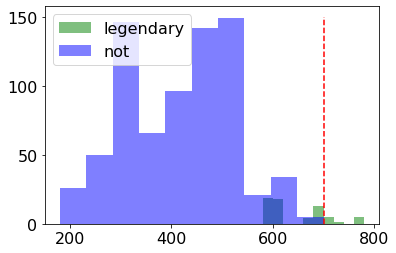

In [77]:
threshold = 700.5
print(tpr_fpr(threshold = threshold))
_ = plt.hist(X[y==True], color='green', alpha=0.5)
_ = plt.hist(X[y==False], color='blue', alpha=0.5)
_ = plt.legend(['legendary', 'not'])
_ = plt.plot([threshold,threshold], [0, 150], 'r--')

### Manual plotting of Receiver Operating Characteristic

In [101]:
X = poke['Total']
# X = np.random.randint(150, 900, 800)
y = poke['Legendary']

tprs = []
fprs = []

for threshold in range(150, 900, 10):
    evaluation = tpr_fpr(threshold = threshold)
    #print(f"{threshold=}, tpr: {evaluation['tpr']}, fpr: {evaluation['fpr']}")
    tprs.append(evaluation['tpr'])
    fprs.append(evaluation['fpr'])

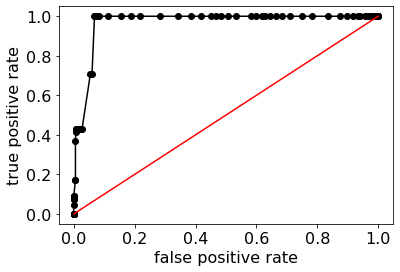

In [102]:
_ = plt.plot(fprs, tprs, 'ko-')
_ = plt.xlabel('false positive rate')
_ = plt.ylabel('true positive rate')

_ = plt.plot([0,1], [0,1], 'r-')

### Manual optimization of decision rule

What is our overall loss/gain function?

In [118]:
# loss function: how much do we care about different kinds of errors:
# false positive  -1
# false negatives: 1-tpr  -1

def loss(y, y_predicted):
    # of false positives:
    false_positives = sum((y == False) & (y_predicted == True))
    # of false negatives
    false_negatives = sum((y == True) & (y_predicted == False))
    # conf_mat = confusion_matrix(y, y_predicted)
    # false_positives = conf_mat[0,1]
    # false_negatives = conf_mat[1,0]
    return false_positives + 5*false_negatives

In [119]:
threshold = 6000
y_predicted = X > threshold
loss(y, y_predicted)

325

In [116]:
min_loss = 800
min_loss_threshold = None
for threshold in range(150, 900):
    y_predicted = X > threshold
    cur_loss = loss(y, y_predicted)
    if cur_loss < min_loss:
        min_loss = cur_loss
        min_loss_threshold = threshold

print(min_loss_threshold, min_loss)

579 48


In [120]:
y_predicted = X > min_loss_threshold
confusion_matrix(y, y_predicted)

array([[687,  48],
       [  0,  65]])

In [121]:
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Scikit learn classification



## K nearest neighbors

### Labels and features

In [124]:
X = poke.loc[:,'HP':'Generation']
y = poke['Legendary']

In [127]:
X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,1
2,80,82,83,100,100,80,1
3,80,100,123,122,120,80,1
4,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6
796,50,160,110,160,110,110,6
797,80,110,60,150,130,70,6
798,80,160,60,170,130,80,6


### Train and test split

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    random_state=0)
# note, random_state provided to yield consistent behavior over runs

### fit classifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier

nn_3 = KNeighborsClassifier(3)
nn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluate performance (on test)

In [139]:
from sklearn.metrics import accuracy_score
y_test_prediction = nn_3.predict(X_test)
accuracy_score(y_test, y_test_prediction)

0.93

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_prediction)

array([[178,   4],
       [ 10,   8]])

### **Decision tree**

Build a tree of binary decisions of the form "feature X >= threshold", so as to separate the classes.

In [147]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# max_depth

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

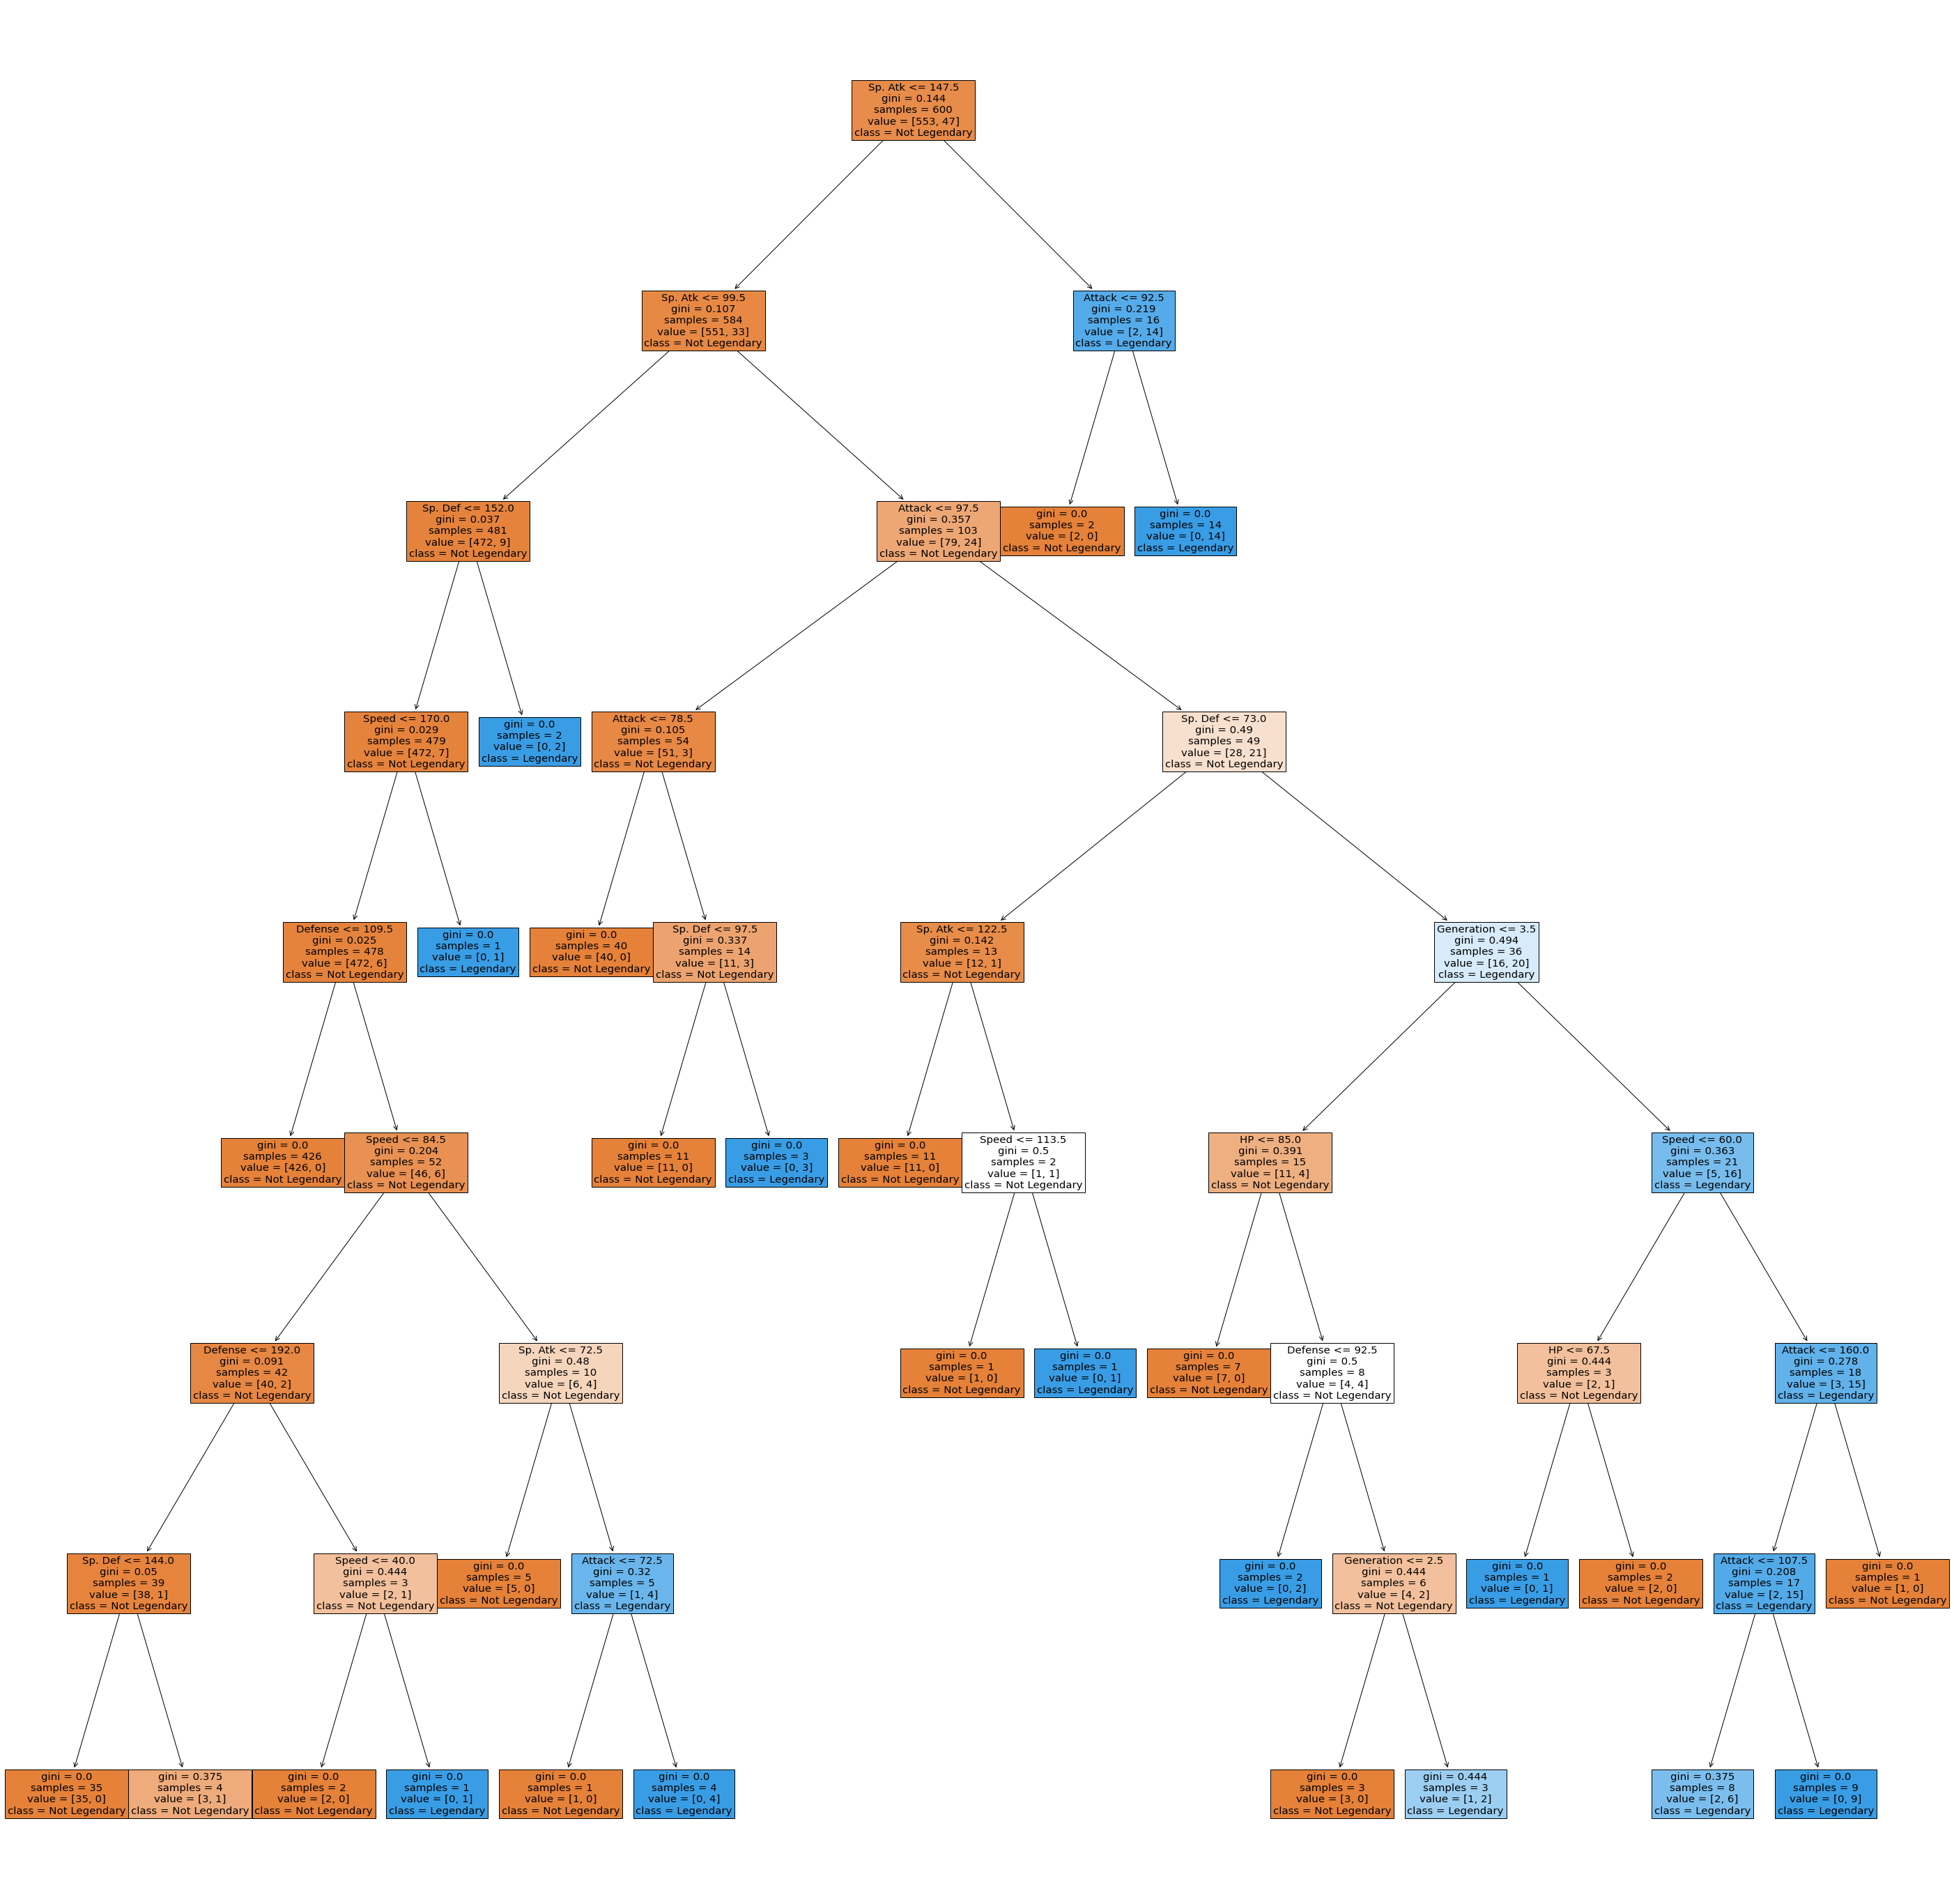

In [148]:
fig = plt.figure(figsize = (50,50))
_ = tree.plot_tree(dt, 
                   feature_names = poke.loc[:,'HP':'Generation'].columns,
                  class_names = ['Not Legendary', 'Legendary'],
                  filled = True)

## Evaluating what a classifier is doing

In [150]:
X = poke[['Defense','Attack']]
y = poke['Legendary']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.75,
                                                   random_state=0)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

In [201]:
nn_3 = KNeighborsClassifier(3)
nn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [202]:
defense = np.linspace(X['Defense'].min(),X['Defense'].max(), 50)
attack = np.linspace(X['Attack'].min(),X['Attack'].max(), 50)

In [203]:
longdefense = []
longattack = []
predictions = []

for d in defense:
    for a in attack:
        longdefense.append(d)
        longattack.append(a)
        predictions.append(nn_3.predict([[d,a]])[0])

longdefense = np.array(longdefense)
longattack = np.array(longattack)
predictions = np.array(predictions)


Text(0, 0.5, 'attack')

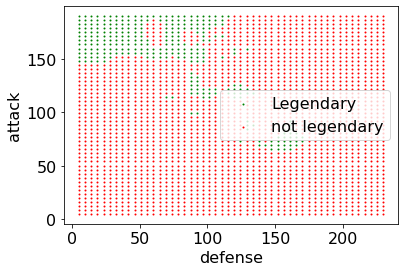

In [210]:
plt.scatter(longdefense[predictions==True], 
            longattack[predictions==True], s=1, 
            color='green')
plt.scatter(longdefense[predictions==False], 
            longattack[predictions==False], s=1, 
            color='red')
plt.legend(['Legendary', 'not legendary'])
plt.xlabel('defense')
plt.ylabel('attack')

#plt.plot(X_train['Defense'][y_train], 
#         X_train['Attack'][y_train], 'go', alpha=0.3)

#plt.plot(X_train['Defense'][y_train==False], 
#         X_train['Attack'][y_train==False], 'ro', alpha=0.3)


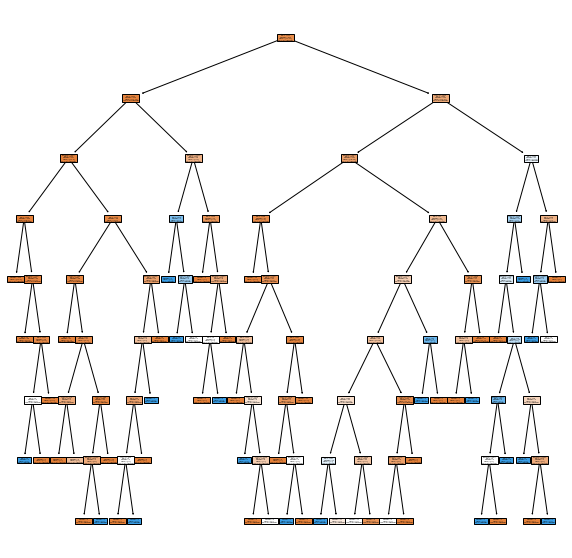

In [200]:
fig = plt.figure(figsize = (10,10))
_ = tree.plot_tree(dt, 
                   feature_names = X_train.columns,
                  class_names = ['Not Legendary', 'Legendary'],
                  filled = True)

## Linear / Quadratic discriminant analysis

Model the classes as multivariate gaussians either with constant covariances (linear) or with different covariances (quadratic).  Draw the resulting boundary based on posterior probability.

```
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
```

![linear quad disc](sphx_glr_plot_lda_qda_001.png)

## Logistic Regression

Log odds of positive choice increases as a linear function of *features*.  Log-odds yields probability via logistic transform.

![logistic](linear_vs_logistic_regression_edxw03.webp)

## Support vector machines

Find a maximum margin separating boundary.  Boundary determined by closest instances -- support vectors.

![max margin](600px-SVM_margin.png)

### Kernel trick

Intuition: project features into a higher dimensional space via non-linear transformations.  Trick is that instead of representing the new features, replace feature representation of data points with data-data similarity, and replace similarity between feature vectors via a kernel, rather than just a dot-product.

![kernel trick](440px-Kernel_trick_idea.svg.png)

## Simple neural networks

```from sklearn.neural_network import MLPClassifier```


![perceptron](multilayerperceptron_network.png)

### Ensemble models

**Random forests**

```sklearn.ensemble.RandomForestClassifier```

**Gradient Boosted trees**

```sklearn.ensemble.GradientBoostingClassifier```

## Fairness

Problem: machine learning algorithms make predictions that we do not like.  E.g.:

- predict higher recidivism rates for black vs white parolees,  

- predict higher click-through rates on ads for executive jobs presented to male viewers  

- systematically misidentify black faces in photos   

- translate 'the surgeon ate her lunch' into 'the surgeon ate his lunch'

We do not like this, and we would like machines to behave better.

### Why do machines do this? and what can be done?

machines do not know, or care about, our particular notions of race, gender, etc.  

these behaviors arise from fitting models to optimize prediction on some training data.  

Some possible reasons / solutions:

- **the bias is in the data selection/sampling process**.  Careful stratified, unbiased, random sampling of data (rather than convenience, natural-world samples).  Generate synthetic data without bias, etc.

- **the bias is in the training labels**.  Throw out those labels, and get unbiased labels.

- **the bias is in the feature representation**.  Hopefully better features are available, or features may be transformed.

- **the bias is in the world**.  This is unfortunately a very common, and most tricky, situation.  Various criteria for algorithm fairness try to deal with this problem.


### Defining fairness

Fairness is not easy to define, in the face of differences in the world.  There are multiple, intuitively appealing, definitions of fairness that cannot be simultaneously achieved.

Let's say we want to predict whether a given loan applicant will default on their loan, based on FICO score (and not give a loan in that case). 

![Fico scores](fico-scores.png)

What is a fair way to predict default rates (and thus to decide on whether to give a loan to particular individuals, or to decide how high interest rate to charge?)

